# 02 — Introduction (extended), GMMs and SVMs

This notebook extends the introduction from the last notebook and continues with GMMs and SVMs.

As before, 
1. add the unmodified notebook to a new (or the former) git-repo
2. run all notebook cells in order and commit files it generates (if any)
3. adjust the notebook according to the exercies, answer questions in the provided MD-cells, 
4. run all notebook cells in order
5. commit the changed notebook
6. commit files it generates (if any)

upload a git-bundle of your repo to StudIP \
BearbeitetePraktikumsaufgaben/Praktikum09\
till __7.1.21 18:00__

# Iris dataset

### Loading the data

The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is so popular that scikit-learn can load it out-of-the-box:

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Exercise 1b
Plot the data of only the first two dimension, labelling the axes according to the plotted quantities. [This](https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array#54508052) might be helpful.

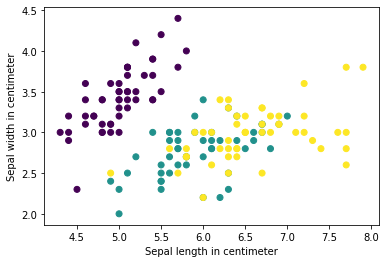

In [3]:
## plot first two dimension
dam=X.to_numpy()
plt.scatter(dam[:,0], dam[:,1], c = iris.target)
plt.xlabel('Sepal length in centimeter')
plt.ylabel('Sepal width in centimeter')
plt.show()

### Exercise 1c
Plot the data of only the last two dimension, labelling the axes according to the plotted quantities.

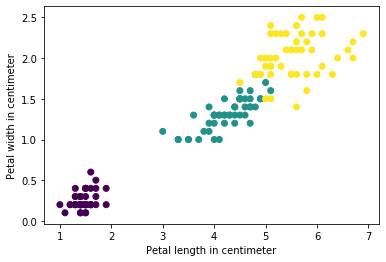

In [4]:
## plot last two dimension
plt.scatter(dam[:,2], dam[:,3], c = iris.target)
plt.xlabel('Petal length in centimeter')
plt.ylabel('Petal width in centimeter')
plt.show()

### Exercise 1d
Use the [mplot3d module](https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html) to create a 3D plot the data using the first three dimension, labelling the axes according to the plotted quantities.

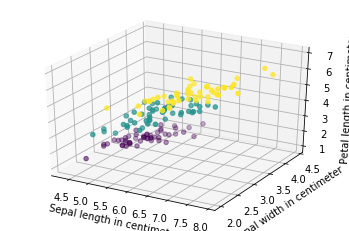

In [5]:
## static 3D plot with labelled axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dam[:,0], dam[:,1],dam[:,2], c=iris.target)

ax.set_xlabel('Sepal length in centimeter')
ax.set_ylabel('Sepal width in centimeter')
ax.set_zlabel('Petal length in centimeter')

plt.show()

basing on the previous notebook here, __focusing on labelling the axes in the plot__:

### Principal Component Analysis

As you can see, the dataset has 4 numerical features (dimensions). If we want to show all the information in a 2D plot, we have to perform a dimensionality reduction first. We will use [scikit-learn's implementation of PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for this.

### Exercise 2

Use PCA to transform the original data into 2 dimensions and show the transformed data in a scatter plot, with the colors of each data point corresponding to the `target` value.\
__Also annotate the axes with their labels again.__

In [6]:
## do PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)
X_pca=pca.transform(X) #regular PCA
da=iris.target

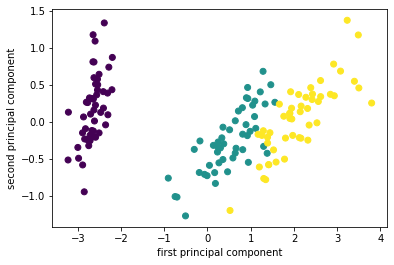

In [7]:
## create scatter plot of PCA output
plt.scatter(X_pca[:,0], X_pca[:,1], c = da)
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

### Exercise 2b
Now create a 3D scatter plot again (in the order 2,0,1), enabling interactions with `%matplotlib notebook` ([see here](https://stackoverflow.com/questions/38364435/python-matplotlib-make-3d-plot-interactive-in-jupyter-notebook#38865534), [does not work in JupyterLab](https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab)) and orient the 3D view such that it resembles the 2D plot of the PCA.\
Then fix the 3D view to the found azimuth and elevation with [`view_init`](https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib#12905458).

### Question
There are (at least) two reasons why the 3D viw can only look similar to the 2D PCA plot. Do you know why? Explain!

### Answers
1. 
2. 

<IPython.core.display.Javascript object>


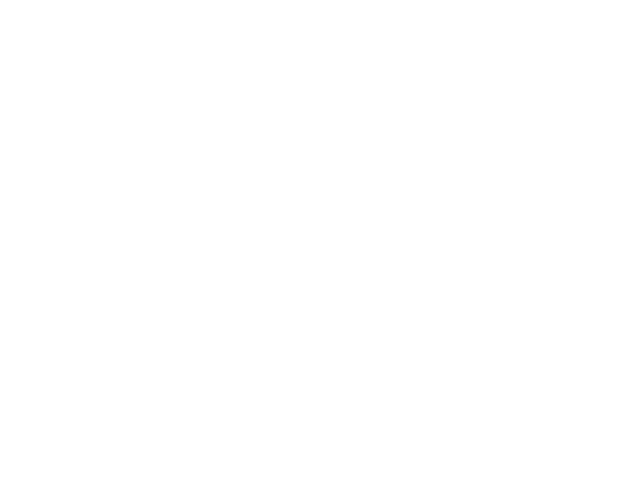

In [8]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dam[:,2], dam[:,0],dam[:,1], c=iris.target)

ax.set_xlabel('Sepal length in centimeter')
ax.set_ylabel('Sepal width in centimeter')
ax.set_zlabel('Petal length in centimeter')

ax.view_init(elev=16., azim=-90)

plt.show()

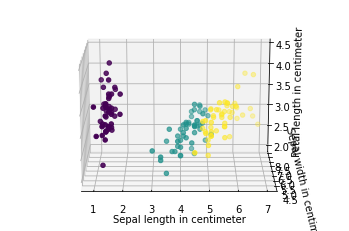

In [9]:
## switch off interaction for the following plots
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dam[:,2], dam[:,0],dam[:,1], c=iris.target)

ax.set_xlabel('Sepal length in centimeter')
ax.set_ylabel('Sepal width in centimeter')
ax.set_zlabel('Petal length in centimeter')

ax.view_init(elev=16., azim=-90)

plt.show()

### Exercise 3

Now try to separate the clusters with scikit-learn's implementation of [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) once with the 2D data from the PCA and once with the original 4D data.

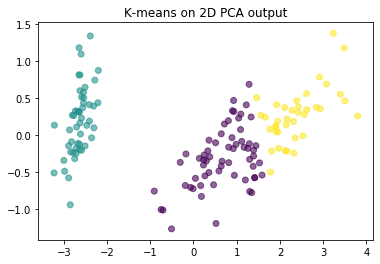

In [10]:
## K-means on 2D PCA output, just copy your solution from last notebook
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
plt.title("K-means on 2D PCA output")
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c=kmeans.labels_, cmap='viridis')

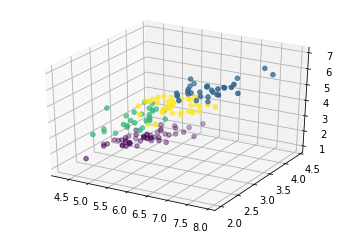

In [11]:
## K-means on orig 4D data, just copy your solution from last notebook
kmeans = KMeans(n_clusters=4, random_state=42).fit(dam)
axy = plt.axes(projection ='3d')
axy.scatter(dam[:,0], dam[:,1], dam[:,2], c=kmeans.labels_, cmap='viridis')
plt.show()

#kmeans = KMeans(n_clusters=4, random_state=42).fit(dam)
#plt.scatter(dam[:,0], dam[:,1], c=kmeans.labels_, cmap='viridis')
#plt.show()

### Exercise 4

Now try to separate the clusters with scikit-learn's implementation of [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) again once with the 2D data from the PCA and once with the original 4D data, (you may stop trying to find apropriate parameters after 10 minutes).

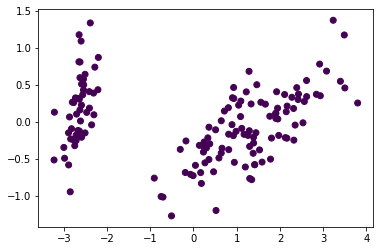

In [12]:
## DBSCAN on 2D PCA output, just copy your solution from last notebook
clust = DBSCAN(eps=3, min_samples=2).fit(X_pca)
plt.scatter(X_pca[:,0],X_pca[:,1], c=clust.labels_, cmap='viridis')
plt.show()

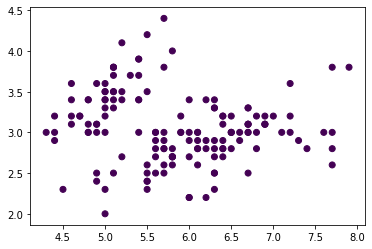

In [14]:
## DBSCAN on orig 4D data, just copy your solution from last notebook
clust = DBSCAN(eps=3, min_samples=2).fit(dam)
plt.scatter(dam[:,0], dam[:,1], c=clust.labels_, cmap='viridis')

#clustering = DBSCAN(eps=3, min_samples=2).fit(dam)
#axy = plt.axes(projection ='3d')
#axy.scatter(dam[:,0], dam[:,1], dam[:,2], c=clustering.labels_, cmap='viridis')
plt.show()

### Exercise 5

Try if scaling the data to a common mean and standard deviation helps to separate the clusters with DBSCAN in 4D.\
Use the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)  for scaling and check the statistics of the scaled features with pandas [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html).


In [15]:
## scale orig 4D data with StandardScaler and output the statistics of the scaled features
scale=StandardScaler().fit(dam)
op=scale.transform(dam)
mk = pd.DataFrame(data=op)
mk.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


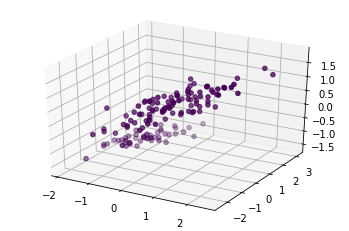

In [16]:
## DBSCAN on scaled 4D data
clus = DBSCAN(eps=3, min_samples=2).fit(op)
axy = plt.axes(projection ='3d')
axy.scatter(op[:,0], op[:,1], op[:,2], c=clus.labels_, cmap='viridis')
plt.show()

### Exercise 6

Now test a Gaussian Mixture Models (GMMs) ([GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)) and plot it side-by-side (as above for the blobs) with the actual labels (as color).

In [17]:
## apply a GMM assuming 3 clusters
mdg = GaussianMixture(n_components=3, random_state=42).fit(dam)
lbl=mdg.predict(dam)

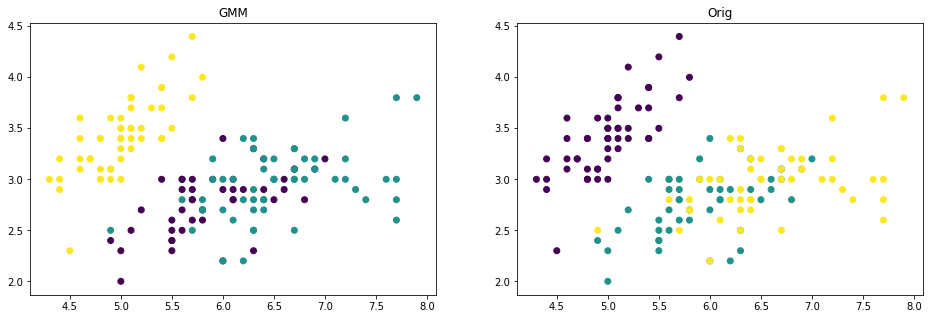

In [66]:
## scatter plot using the GMM labels side-by-side to a scatter plot with the original lables (as color)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("GMM")
plt.scatter(dam[:,0], dam[:,1], c=lbl)
plt.subplot(1,2,2)
plt.title("Orig")
plt.scatter(dam[:,0], dam[:,1], c=iris.target)
plt.show();

## Support Vector Machines (SVMs)

All ML methods above did not make use of the labels (only used for coloring). 
Now make use of the labels of the dataset to train a supervised ML method, like an SVM. Use the following function [plot_predictions](https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification
) for visualizing the decision boundaries of the trained SVM.

In [67]:
## from https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) #Returns 100 evenly spaced samples, calculated over the interval [axes[0], axes[1]]
    x1s = np.linspace(axes[2], axes[3], 100) #Returns 100 evenly spaced samples, calculated over the interval [axes[2], axes[3]]
    x0, x1 = np.meshgrid(x0s, x1s) #Return coordinate matrices from coordinate vectors.  useful to evaluate functions on a grid
    X = np.c_[x0.ravel(), x1.ravel()] #horizontal concatenation
    y_pred = clf.predict(X).reshape(x0.shape) #Gives a new shape to labels without changing its data
    # y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

### Exercise 7

Try to understand how the function `plot_predictions` works and explain each active code line by adding a trailing comment.


In [ ]:
### Exercise 8

Next fit the PCA data (2D) with a linear SVM. Use scikit-learn for that. If you get a \
`ConvergenceWarning: Liblinear failed to converge, increase the number of iterations`\
try e.g. `max_iter=1e6`, see: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

Plot the decision boundaries of the trained SVM together with the colored training points (as before).

#### Quenstions
1. What effect has changing the hyper-parameter C? (Try e.g. 1, 10, 100)
2. How can you see from the plot, that a linear SVM. was used?

#### Answers
1. C affects the trade-off between complexity and proportion of nonseparable samples
2. 

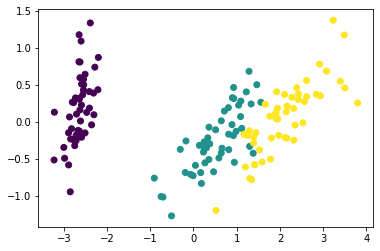

In [83]:
def make_meshgrid(x, y, h=.02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

C = 1.0  # SVM regularization parameter
models = svm.LinearSVC(C=C)
models = (clf.fit(X_pca, da))

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.title("LinearSVC (linear kernel")
X0, X1 = X_pca[:, 0], X_pca[:, 1]
#xx, yy = make_meshgrid(X0, X1)
plt.scatter(X0, X1, c=da)

plt.subplot(1,2,2)
plt.title("decision bounndaries of the trained SVM")
plt.scatter(dam[:,0], dam[:,1], c=iris.target)

plt.show()

'''

'''

### Exercise 9

Extend you SVM evaluation with `PolynomialFeatures` followed by a `StandardScaler`, for ideas how to do that look through:\
https://nbviewer.jupyter.org/github/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb#Non-linear-classification

Plot the decision boundaries of the trained SVM together with the colored training points (as before).

#### Quenstions
1. What effect has changing degree of the `PolynomialFeatures`? (Try e.g. 1, 2, 3, 5, 10, 20)
2. Why are we using the PCA data and not the original iris data?

#### Answers
1. 
2. 

In [ ]:
## train SVM with PolynomialFeatures (which probably need scaling)

## plot decision boundaries and training data

## Splitting the dataset for training and testing

By holding back some of the data during the training of ML models, the remaining data can be used to evaluate the performance of the resulting model. This is often called testing. This has the disadvantage, that not all data can be used for training.

### Exercise

Use sklearn's `train_test_split` to split the iris dataset into a training dataset (75%) and a testing dataset (25%).\
Then train your linear and polynomial SVMs on the reduced training dataset and then check their performance with the `score()` function of each classifier.

In [ ]:
## load and apply train_test_split

## report the sizes of the resulting training and testing datasets

In [ ]:
## train and evaluate the resulting linear SVM model

In [ ]:
## train and evaluate the resulting polynomial SVM model

To avoid problems from this *static* separation into train and test datasets, it is possible to divide the full dataset into e.g. 4 (nearly) equally sized subsets (called folds). Then it is possible to use each fold once as test set and the other folds for training, a kid of *dynamic* separation. This technique is called cross-validation (CV).

### Exercise

Scoring a classifier in sklearn with CV can be done with `cross_val_score`. Print the scores CV yields for the linear and the polynomial SVM.

In [ ]:
## apply cross_val_score on both SVMs and report their scores

Be aware, that the differing scores just arise from using the different training subsets!

The ability to score differntly trained models also bings a way to test models differing in their hyper-parameters. This allows to "automatically" determin the best combination of a set of various hyper-parameters (called grid). This is called `GridSearchCV` in sklearn. Using only a random subset of this grid (to reduce the total computation load) is provided by `RandomizedSearchCV`. 